In [6]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
img=cv2.imread('4.jpg')
img.shape

(837, 1600, 3)

In [5]:
img[:,:,-1].shape

(1376, 2200)

In [24]:
# red-> red plane - gray plane
# 0.6R+0.3G+0.1B.
#red-> redplane-gray
#green-> greenplane-gray
#blue-> blueplane-gray
#cyan-> gray-redplane
#magenta-> gray-greenplane
#yellow-> gray-blueplane



In [30]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
red_plane=img[:,:,-1].copy()
green_plane=img[:,:,-2].copy()
blue_plane=img[:,:,-3].copy()

In [33]:
red_color=cv2.subtract(red_plane,gray)
green_color=cv2.subtract(green_plane,gray)
blue_color=cv2.subtract(blue_plane,gray)
yellow_color=cv2.subtract(gray,blue_plane)
magenta_color=cv2.subtract(gray,green_plane)
cyan_color=cv2.subtract(gray,red_plane)

In [34]:
def imshow(im,title,type=''):
    if type:
        plt.imshow(im,cmap=type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')

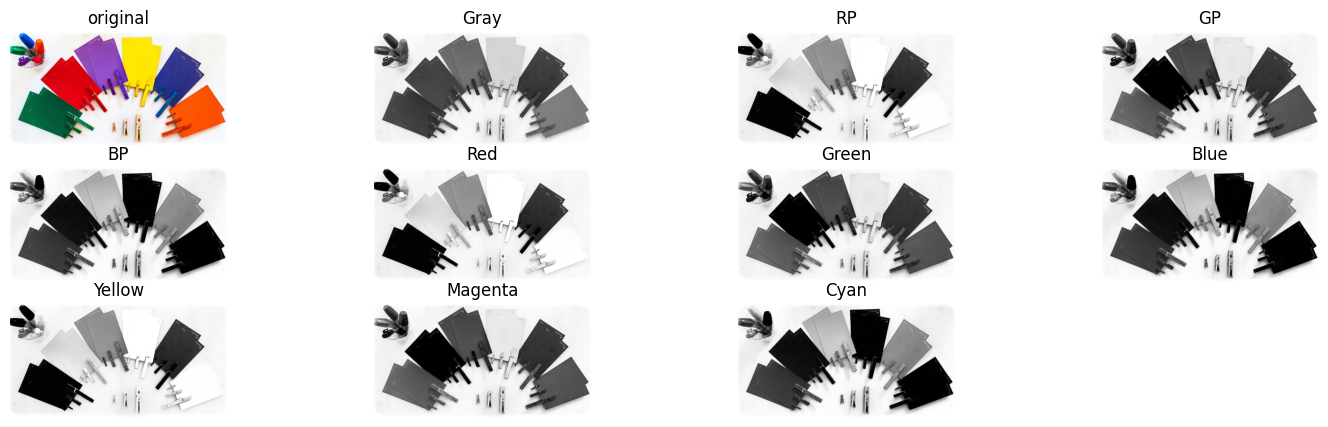

In [38]:
plt.figure(figsize=(18,5))
plt.subplot(3,4,1);imshow(img[:,:,::-1],'original')
plt.subplot(3,4,2);imshow(gray,'Gray','gray')
plt.subplot(3,4,3);imshow(red_plane,'RP','gray')
plt.subplot(3,4,4);imshow(green_plane,'GP','gray')
plt.subplot(3,4,5);imshow(blue_plane,'BP','gray')
plt.subplot(3,4,6);imshow(red_plane,'Red','gray')
plt.subplot(3,4,7);imshow(green_plane,'Green','gray')
plt.subplot(3,4,8);imshow(blue_plane,'Blue','gray')
plt.subplot(3,4,9);imshow(red_plane,'Yellow','gray')
plt.subplot(3,4,10);imshow(green_plane,'Magenta','gray')
plt.subplot(3,4,11);imshow(blue_plane,'Cyan','gray')
plt.show()

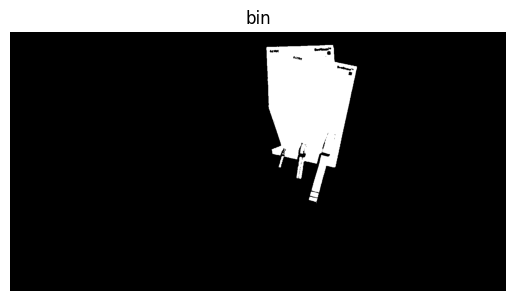

In [50]:
th,y_bw=cv2.threshold(yellow_color,180,255,cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [51]:
import skimage as ski

In [52]:
rp=ski.measure.regionprops(y_bw)
len(rp)

1

In [53]:
rp0=rp[0]
y1,x1,y2,x2=rp0.bbox

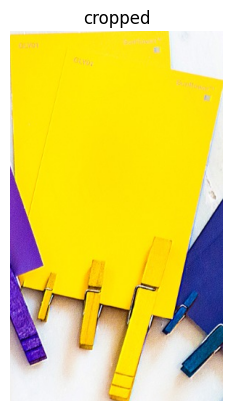

In [54]:
img_cropped=img[y1:y2,x1:x2,:].copy()
imshow(img_cropped[:,:,::-1],'cropped')

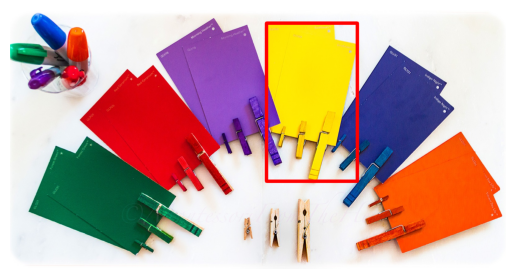

In [56]:
img_copy=img.copy()
cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=10)
imshow(img_copy[:,:,::-1],'')